# Спектральные методы

Материалы:
* Макрушин С.В. "Лекция 5: Выявление сообществ в сетях 2. Спектральные методы"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/cuts.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html  
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.radius_neighbors_graph.html

## Разрез

1.1 Задан граф `G`. Определите два разреза:

*  $C^{(1)}=(N_1^{(1)}, N_2^{(1)})$, $N_1^{(1)} = \{0, 1, 2, 3, 4\}$, $N_2^{(1)} = \{5, 6, 7, 8, 9\} $
*  $C^{(2)}=(N_1^{(2)}, N_2^{(2)})$, $N_1^{(2)} = \{0, 1, 2, 3, 4, 5, 6, 7, 8\}$, $N_2^{(2)} = \{9\} $

Для каждого из разрезов вычислите величину $$Q^{(k)}=cut(N_1^{(k)},N_2^{(k)})=\sum_{i \in N_1^{(k)}, j \in N_2^{(k)}} l_{ij}$$

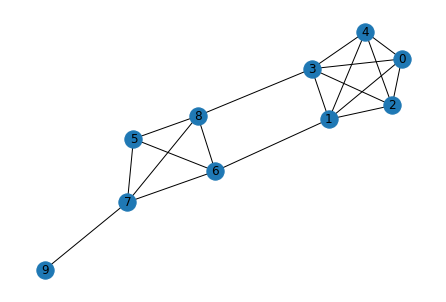

In [23]:
import networkx as nx
from itertools import combinations
import numpy as np

G = nx.Graph()
G.add_edges_from(combinations(range(5), 2))
G.add_edges_from(combinations(range(5, 9), 2))
G.add_edges_from([(8, 3), (6, 1), (7, 9)])
pos = nx.spring_layout(G, seed=30)
nx.draw(G, pos=pos, with_labels=True)

In [24]:
N1 = {0, 1, 2, 3, 4} 
N2 = {5, 6, 7, 8, 9} 
nx.cut_size(G, N1, N2)

2

In [26]:
sum(N1)

10

1.2 Для разрезов из задания 1.1 вычислите 
$$Q_{normalized}^{(k)}=\frac{cut(N_1^{(k)},N_2^{(k)})}{Vol(N_1^{(k)})}+\frac{cut(N_1^{(k)},N_2^{(k)})}{Vol(N_2^{(k)})}$$
и
$$Q_{quotient}^{(k)}=\frac{cut(N_1^{(k)},N_2^{(k)})}{\min(Vol(N_1^{(k)}),Vol(N_2^{(k)}))}$$

In [27]:
Q_n = nx.cut_size(G, N1, N2)/sum(N1) + nx.cut_size(G, N1, N2)/sum(N2); Q_n

0.2571428571428572

In [28]:
Q_k = nx.cut_size(G, N1, N2)/min(sum(N1), sum(N2)); Q_k

0.2

## Матрица Лапласа

2.1 Для графа `G` из задания 1.1 вычислите матрицу Лапласа двумя способами:
* по формуле $\mathbf{L}=\mathbf{D}-\mathbf{A}$;
* используя готовую функцию из `networkx`.

In [6]:
A = nx.adjacency_matrix(G).toarray()
D = np.diag(A.sum(axis=0))
L = D - A; L

array([[ 4, -1, -1, -1, -1,  0,  0,  0,  0,  0],
       [-1,  5, -1, -1, -1,  0, -1,  0,  0,  0],
       [-1, -1,  4, -1, -1,  0,  0,  0,  0,  0],
       [-1, -1, -1,  5, -1,  0,  0,  0, -1,  0],
       [-1, -1, -1, -1,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3, -1, -1, -1,  0],
       [ 0, -1,  0,  0,  0, -1,  4, -1, -1,  0],
       [ 0,  0,  0,  0,  0, -1, -1,  4, -1, -1],
       [ 0,  0,  0, -1,  0, -1, -1, -1,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  1]], dtype=int32)

In [10]:
L_m = nx.laplacian_matrix(G); L_m.toarray()

array([[ 4, -1, -1, -1, -1,  0,  0,  0,  0,  0],
       [-1,  5, -1, -1, -1,  0, -1,  0,  0,  0],
       [-1, -1,  4, -1, -1,  0,  0,  0,  0,  0],
       [-1, -1, -1,  5, -1,  0,  0,  0, -1,  0],
       [-1, -1, -1, -1,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3, -1, -1, -1,  0],
       [ 0, -1,  0,  0,  0, -1,  4, -1, -1,  0],
       [ 0,  0,  0,  0,  0, -1, -1,  4, -1, -1],
       [ 0,  0,  0, -1,  0, -1, -1, -1,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  1]], dtype=int32)

2.2. Для каждого из разрезов из задания 1.1 вычислите величины $Q^{(k)}$, воспользовавшись матрицей Лапласа.

In [9]:
S = list(G.nodes()) 
N1 = {0, 1, 2, 3, 4} 
for i in range(len(S)): 
    if S[i] in N1: 
        S[i] = 1 
    else: 
        S[i] = -1 
S = np.reshape(S, (-1,1))
ST = np.transpose(S)
# ST = S.T
Q=ST.dot(L); Q 
Q=Q.dot(S)/4; Q
# Q = ST @ L @ S / 4
Q

array([[2.]])

2.3. Найдите собственные значения и собственные векторы матрицы Лапласа, полученной в задании 2.1. Выведите на экран кратность нулевого собственного значения матрицы Лапласа. Найдите количество компонент связности в графе `G`.

In [13]:
G = nx.karate_club_graph()
L = nx.laplacian_matrix(G).toarray()
w, v = np.linalg.eig(L)
w = sorted(w)
pos = np.isclose(w, 0).sum()
v_ = v[:, pos]
v_

array([ 0.94093217, -0.06586476, -0.11506912, -0.05475796, -0.05828791,
       -0.06339776, -0.06339776, -0.05402   , -0.05953766,  0.02104995,
       -0.05828791, -0.05860617, -0.05886178, -0.04175792,  0.00846872,
        0.00846872,  0.00842206, -0.05812404,  0.00846872, -0.04789881,
        0.00846872, -0.05812404,  0.00846872,  0.00756388,  0.00346764,
        0.00468293,  0.01286202,  0.02342972,  0.02801542,  0.00820151,
        0.01937167, -0.07685092,  0.07434337, -0.20184142])

## Спектральный алгоритм поиска наименьшего разреза

3.1 Загрузите граф `Karate Club`. Вычислите матрицу Лапласа $\mathbf{L}=\mathbf{D}-\mathbf{A}$. Найдите собственные значения и собственные векторы матрицы Лапласа. Выделите собственный вектор $\mathbf{u}$, отвечающий второму снизу с.з. $\lambda_2 \ne 0$. Преобразуйте $\mathbf{u}$ в индикаторный вектор $\mathbf{f}$ по правилу $\mathbf{f}_i$ = sign($\mathbf{u}_{i})$. Визуализируйте $\mathbf{u}$ и полученный разрез.

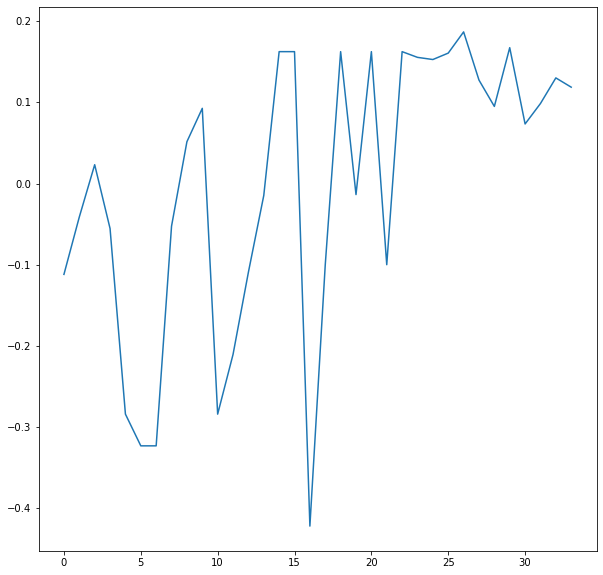

In [11]:
import matplotlib.pyplot as plt
G = nx.karate_club_graph()
L = nx.laplacian_matrix(G).toarray()
e, v = np.linalg.eig(L)
u = v[:,np.where(e==np.sort(e[e > 10e-7])[0])[0]]
f = np.sign(u)

fig = plt.figure(figsize = (10, 10))
plt.plot(u)

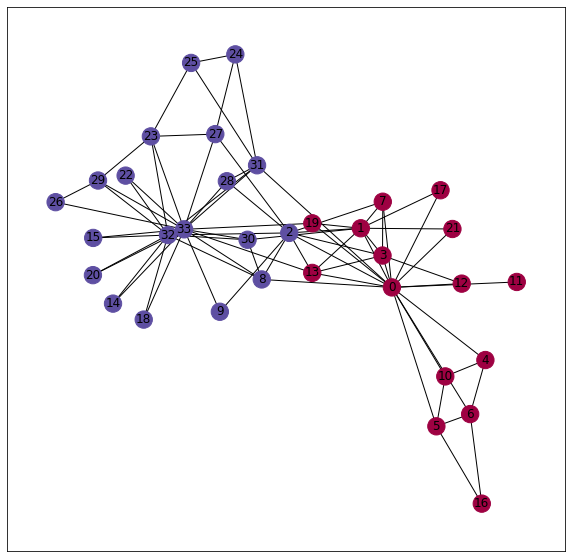

In [12]:
cmap = plt.cm.Spectral
plt.figure(figsize = (10, 10))
nx.draw_networkx(G, node_color = f.reshape(1,-1), cmap = cmap, with_labels = True)

3.2 Повторите 3.1, используя нормализованную матрицу Лапласа $\mathbf{L}_{sym}=\mathbf{D^{-\frac{1}{2}}}\mathbf{L}\mathbf{D^{-\frac{1}{2}}}$.

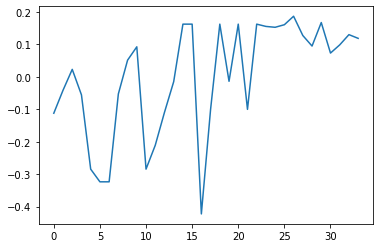

In [18]:
G = nx.karate_club_graph()
LS = nx.normalized_laplacian_matrix(G).toarray()
w,v=np.linalg.eig(L) 
z=list(w) 
z.remove(min(w)) 
v1=list(w).index(min(z)) 
plt.plot(range(len(np.ndarray.tolist(v[:,v1]))),np.ndarray.tolist(v[:,v1]))

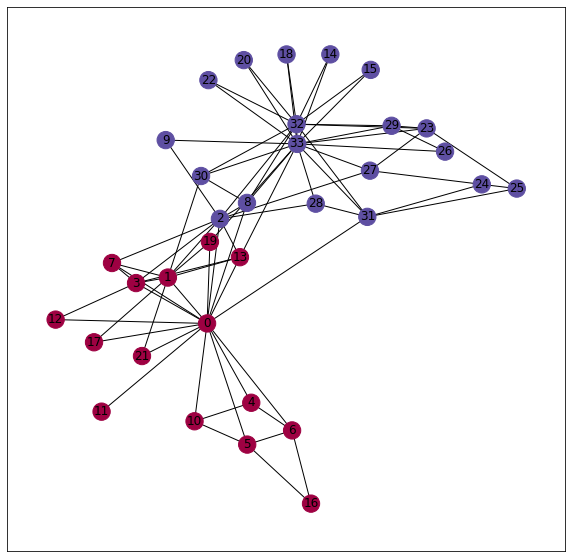

In [19]:
cmap = plt.cm.Spectral
plt.figure(figsize = (10, 10))
nx.draw_networkx(G, node_color = f.reshape(1,-1), cmap = cmap, with_labels = True)

## Спектральная кластеризация

4.1 Дан набор данных `(X, y`). Визуализируйте набор данных, отрисовав точки на плоскости и раскрасив в цвета, соответствующие меткам объектов `y`. Решите задачу кластеризации данных на 3 кластера при помощи алгоритма KMeans из `sklearn`. Визуализируйте полученный результат.

In [55]:
G1 = nx.Graph()
G1.add_edges_from(X)

In [56]:
len(G1.nodes)

600

In [57]:
color = []
for i in y:
    if i == 0:
        color.append('red')
        color.append('red')
    elif i == 1:
        color.append('yellow')
        color.append('yellow')
    elif i == 2:
        color.append('purple')
        color.append('purple')

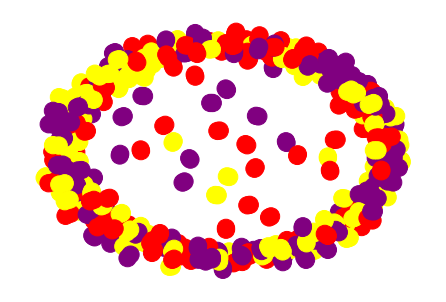

In [66]:
nx.draw(G1, node_color = color)

In [54]:
G1.nodes

NodeView((0.5844814015497406, 0.6708171862128611, -3.8152127146583013, 4.538126438693798, -2.010723015236911, 2.101966913558262, -3.879167359735707, 2.121501176333512, -3.908881464968465, 1.5724583797991531, -3.337501402603591, 3.0760920024517713, -3.1506417365504613, 3.7760785972753763, -4.41532899248236, 2.8680897942270134, -2.1969808160403588, -0.7538559695194689, -3.2446947123543968, 1.6967237662883958, -3.9626708998638636, 4.0630105877111875, 1.648041127535258, -1.232058422472257, 0.8119626226119097, -0.06613443741219749, -2.7929257787539212, 1.1983017961100688, -2.532384747730496, 2.4661308540599567, -2.6010765576984625, 2.288493910326318, 0.3512118585272763, 0.6562487000458597, 0.9548530828620467, -0.6083616932366649, -2.9588274385769635, 2.6339135274593475, -3.431979435292842, 1.6884930877914437, 1.0652047430488367, -0.5575788400603179, -3.341120784024644, 0.9415736568206814, 0.6156727831543416, -0.25736029591506704, 1.5137669515387033, -1.489998386042862, 1.109141344288079, -1

In [20]:
from sklearn.datasets import make_blobs
import numpy as np
X, y = make_blobs(n_samples=300, random_state=170)
X = np.dot(X, [[0.6, -0.6], [-0.4, 0.8]])

In [33]:
from sklearn.cluster import KMeans
labels = KMeans(n_clusters = 3,random_state = 0).fit(X)

In [37]:
X

array([[ 0.5844814 ,  0.67081719],
       [-3.81521271,  4.53812644],
       [-2.01072302,  2.10196691],
       [-3.87916736,  2.12150118],
       [-3.90888146,  1.57245838],
       [-3.3375014 ,  3.076092  ],
       [-3.15064174,  3.7760786 ],
       [-4.41532899,  2.86808979],
       [-2.19698082, -0.75385597],
       [-3.24469471,  1.69672377],
       [-3.9626709 ,  4.06301059],
       [ 1.64804113, -1.23205842],
       [ 0.81196262, -0.06613444],
       [-2.79292578,  1.1983018 ],
       [-2.53238475,  2.46613085],
       [-2.60107656,  2.28849391],
       [ 0.35121186,  0.6562487 ],
       [ 0.95485308, -0.60836169],
       [-2.95882744,  2.63391353],
       [-3.43197944,  1.68849309],
       [ 1.06520474, -0.55757884],
       [-3.34112078,  0.94157366],
       [ 0.61567278, -0.2573603 ],
       [ 1.51376695, -1.48999839],
       [ 1.10914134, -1.07388804],
       [-2.86749318,  0.25054314],
       [ 1.4002698 , -0.65908601],
       [-3.70510006,  3.73822841],
       [ 0.6676763 ,

In [60]:
labels.labels_

array([1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0,
       1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [62]:
color1 = []
for i in labels.labels_:
    if i == 0:
        color1.append('red')
        color1.append('red')
    elif i == 1:
        color1.append('yellow')
        color1.append('yellow')
    elif i == 2:
        color1.append('purple')
        color1.append('purple')

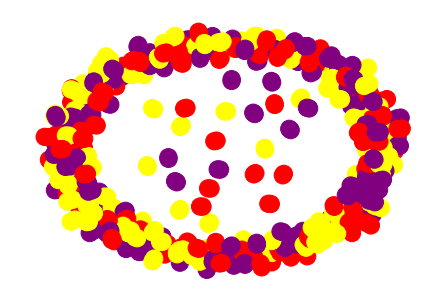

In [63]:
nx.draw(G1, node_color = color1)

4.2 На основе датасета из 4.1 создайте граф соседей узлов при помощи функции `radius_neighbors_graph` из `sklearn` (укажите аргумент `radius=1`). Получите матрицу $\mathbf{U} \in \mathbb{R}^{300\times3}$, состояющую из собственных векторов матрицы Лапласа, соответствующих первым трем ненулевым собственным значениям. Решите задачу кластеризации при помощи алгоритма KMeans из `sklearn` на основе матрицы $\mathbf{U}$. Визуализируйте полученный результат.

In [75]:
from sklearn.neighbors import radius_neighbors_graph
U = radius_neighbors_graph(X, radius = 1, mode='connectivity',include_self=True)
U.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [76]:
labels = KMeans(n_clusters = 3,random_state = 0).fit(U)

In [77]:
labels.labels_

array([1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2,
       1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2])